In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [39]:
symbols = ['AAPL','MSFT','GOOGL','TSLA']
start_date = '2020-01-01'
end_date = '2024-01-01'

In [40]:
new_stock_data = yf.download(symbols, start_date, end_date)

[*********************100%***********************]  4 of 4 completed


In [41]:
print(new_stock_data.head(5))
print(new_stock_data.columns)

Price                      Adj Close                                    \
Ticker                          AAPL      GOOGL        MSFT       TSLA   
Date                                                                     
2020-01-02 00:00:00+00:00  72.876106  68.264961  153.938202  28.684000   
2020-01-03 00:00:00+00:00  72.167610  67.907852  152.021423  29.534000   
2020-01-06 00:00:00+00:00  72.742638  69.717865  152.414352  30.102667   
2020-01-07 00:00:00+00:00  72.400543  69.583206  151.024673  31.270666   
2020-01-08 00:00:00+00:00  73.565193  70.078476  153.430222  32.809334   

Price                          Close                                    \
Ticker                          AAPL      GOOGL        MSFT       TSLA   
Date                                                                     
2020-01-02 00:00:00+00:00  75.087502  68.433998  160.619995  28.684000   
2020-01-03 00:00:00+00:00  74.357498  68.075996  158.619995  29.534000   
2020-01-06 00:00:00+00:00  74.949997 

In [42]:
new_stock_data.info()
new_stock_data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, AAPL)   1006 non-null   float64
 1   (Adj Close, GOOGL)  1006 non-null   float64
 2   (Adj Close, MSFT)   1006 non-null   float64
 3   (Adj Close, TSLA)   1006 non-null   float64
 4   (Close, AAPL)       1006 non-null   float64
 5   (Close, GOOGL)      1006 non-null   float64
 6   (Close, MSFT)       1006 non-null   float64
 7   (Close, TSLA)       1006 non-null   float64
 8   (High, AAPL)        1006 non-null   float64
 9   (High, GOOGL)       1006 non-null   float64
 10  (High, MSFT)        1006 non-null   float64
 11  (High, TSLA)        1006 non-null   float64
 12  (Low, AAPL)         1006 non-null   float64
 13  (Low, GOOGL)        1006 non-null   float64
 14  (Low, MSFT)         1006 non-null   float64
 15  (Low, T

Price     Adj Close                                               Close  \
Ticker         AAPL        GOOGL         MSFT         TSLA         AAPL   
count   1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean     138.864226   107.603802   257.154939   209.126371   140.808131   
std       33.576954    25.052820    55.451840    85.797682    33.313857   
min       54.569725    52.576313   130.141037    24.081333    56.092499   
25%      121.187912    87.811062   215.322430   160.210003   123.592501   
50%      143.754524   109.617069   253.862465   223.489998   145.860001   
75%      164.267044   129.928268   297.197998   262.967491   166.214996   
max      197.361084   149.468399   380.619812   409.970001   198.110001   

Price                                                 High               ...  \
Ticker        GOOGL         MSFT         TSLA         AAPL        GOOGL  ...   
count   1006.000000  1006.000000  1006.000000  1006.000000  1006.000000  ...   
mean     107.870246   262.781928   209.126371   142.321389   109.088274  ...   
std       25.114855    54.621965    85.797682    33.430571    25.275266  ...   
min       52.706501   135.419998    24.081333    57.125000    53.345501  ...   
25%       88.028498   221.469994   160.210003   125.030003    88.856625  ...   
50%      109.888500   259.464996   223.489998   147.264999   111.436501  ...   
75%      130.250000   304.322487   262.967491   168.147503   132.082123  ...   
max      149.838501   382.700012   409.970001   199.619995   151.546494  ...   

Price           Low                      Open                            \
Ticker         MSFT         TSLA         AAPL        GOOGL         MSFT   
count   1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean     259.803986   204.067199   140.675507   107.802233   262.669344   
std       54.415635    83.987942    33.310018    25.168280    54.652568   
min      132.520004    23.367332    57.020000    52.818501   137.009995   
25%      219.130005   153.649998   123.682503    88.102499   222.002502   
50%      255.989998   218.174995   145.540001   109.788750   259.165009   
75%      301.120010   258.307510   166.302498   130.753246   304.230003   
max      378.160004   405.666656   198.020004   151.250000   383.760010   

Price                      Volume                                            
Ticker         TSLA          AAPL         GOOGL          MSFT          TSLA  
count   1006.000000  1.006000e+03  1.006000e+03  1.006000e+03  1.006000e+03  
mean     209.199484  9.895211e+07  3.449913e+07  3.065417e+07  1.332191e+08  
std       85.988785  5.439653e+07  1.501427e+07  1.299798e+07  8.862855e+07  
min       24.980000  2.404830e+07  9.312000e+06  9.200800e+06  2.940180e+07  
25%      159.702499  6.407675e+07  2.502685e+07  2.249522e+07  7.707188e+07  
50%      223.954994  8.467540e+07  3.071800e+07  2.727275e+07  1.071037e+08  
75%      263.557503  1.155069e+08  3.933900e+07  3.462020e+07  1.577770e+08  
max      411.470001  4.265100e+08  1.232000e+08  9.701270e+07  9.140820e+08  

[8 rows x 24 columns]

<Axes: xlabel='Date'>

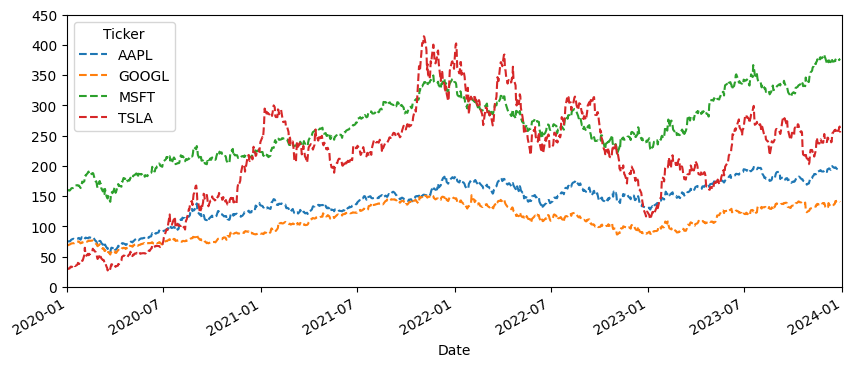

In [43]:
##xlimit and y limit
new_stock_data['High'].plot(xlim=['2020-01-01','2024-01-01'],ylim=[0,450],figsize=(10,4),ls='--')

In [44]:
new_stock_data.index

DatetimeIndex(['2020-01-02 00:00:00+00:00', '2020-01-03 00:00:00+00:00',
               '2020-01-06 00:00:00+00:00', '2020-01-07 00:00:00+00:00',
               '2020-01-08 00:00:00+00:00', '2020-01-09 00:00:00+00:00',
               '2020-01-10 00:00:00+00:00', '2020-01-13 00:00:00+00:00',
               '2020-01-14 00:00:00+00:00', '2020-01-15 00:00:00+00:00',
               ...
               '2023-12-15 00:00:00+00:00', '2023-12-18 00:00:00+00:00',
               '2023-12-19 00:00:00+00:00', '2023-12-20 00:00:00+00:00',
               '2023-12-21 00:00:00+00:00', '2023-12-22 00:00:00+00:00',
               '2023-12-26 00:00:00+00:00', '2023-12-27 00:00:00+00:00',
               '2023-12-28 00:00:00+00:00', '2023-12-29 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=1006, freq=None)

In [45]:
index=new_stock_data.loc['2020-01-01':'2023-01-01'].index
share_open=new_stock_data.loc['2020-01-01':'2023-01-01']['Open']

In [46]:
share_open

Ticker,AAPL,GOOGL,MSFT,TSLA
Date,,,,
2020-01-02 00:00:00+00:00,74.059998,67.420502,158.779999,28.299999
2020-01-03 00:00:00+00:00,74.287498,67.400002,158.320007,29.366667
2020-01-06 00:00:00+00:00,73.447502,67.581497,157.080002,29.364668
2020-01-07 00:00:00+00:00,74.959999,70.023003,159.320007,30.760000
2020-01-08 00:00:00+00:00,74.290001,69.740997,158.929993,31.580000
...,...,...,...,...
2022-12-23 00:00:00+00:00,130.919998,87.110001,236.110001,126.370003
2022-12-27 00:00:00+00:00,131.380005,88.800003,238.699997,117.500000
2022-12-28 00:00:00+00:00,129.669998,86.980003,236.889999,110.349998


In [32]:
index

DatetimeIndex(['2020-01-02 00:00:00+00:00', '2020-01-03 00:00:00+00:00',
               '2020-01-06 00:00:00+00:00', '2020-01-07 00:00:00+00:00',
               '2020-01-08 00:00:00+00:00', '2020-01-09 00:00:00+00:00',
               '2020-01-10 00:00:00+00:00', '2020-01-13 00:00:00+00:00',
               '2020-01-14 00:00:00+00:00', '2020-01-15 00:00:00+00:00',
               ...
               '2022-12-16 00:00:00+00:00', '2022-12-19 00:00:00+00:00',
               '2022-12-20 00:00:00+00:00', '2022-12-21 00:00:00+00:00',
               '2022-12-22 00:00:00+00:00', '2022-12-23 00:00:00+00:00',
               '2022-12-27 00:00:00+00:00', '2022-12-28 00:00:00+00:00',
               '2022-12-29 00:00:00+00:00', '2022-12-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=756, freq=None)

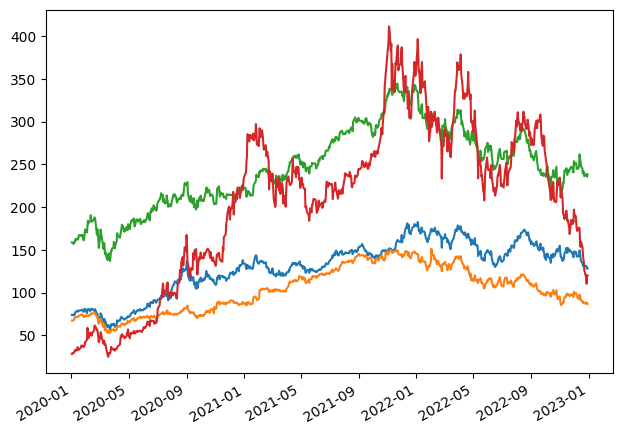

In [47]:
figure,axis=plt.subplots()
plt.tight_layout()
###Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

In [48]:
data=new_stock_data.reset_index()
data = data.set_index('Date',drop=True)
data.head()

Price                      Adj Close                                    \
Ticker                          AAPL      GOOGL        MSFT       TSLA   
Date                                                                     
2020-01-02 00:00:00+00:00  72.876106  68.264961  153.938202  28.684000   
2020-01-03 00:00:00+00:00  72.167610  67.907852  152.021423  29.534000   
2020-01-06 00:00:00+00:00  72.742638  69.717865  152.414352  30.102667   
2020-01-07 00:00:00+00:00  72.400543  69.583206  151.024673  31.270666   
2020-01-08 00:00:00+00:00  73.565193  70.078476  153.430222  32.809334   

Price                          Close                                    \
Ticker                          AAPL      GOOGL        MSFT       TSLA   
Date                                                                     
2020-01-02 00:00:00+00:00  75.087502  68.433998  160.619995  28.684000   
2020-01-03 00:00:00+00:00  74.357498  68.075996  158.619995  29.534000   
2020-01-06 00:00:00+00:00  74.949997  69.890503  159.029999  30.102667   
2020-01-07 00:00:00+00:00  74.597504  69.755501  157.580002  31.270666   
2020-01-08 00:00:00+00:00  75.797501  70.251999  160.089996  32.809334   

Price                           High             ...         Low             \
Ticker                          AAPL      GOOGL  ...        MSFT       TSLA   
Date                                             ...                          
2020-01-02 00:00:00+00:00  75.150002  68.433998  ...  158.330002  28.114000   
2020-01-03 00:00:00+00:00  75.144997  68.687500  ...  158.059998  29.128000   
2020-01-06 00:00:00+00:00  74.989998  69.916000  ...  156.509995  29.333332   
2020-01-07 00:00:00+00:00  75.224998  70.175003  ...  157.320007  30.224001   
2020-01-08 00:00:00+00:00  76.110001  70.592499  ...  157.949997  31.215334   

Price                           Open                                    \
Ticker                          AAPL      GOOGL        MSFT       TSLA   
Date                                                                     
2020-01-02 00:00:00+00:00  74.059998  67.420502  158.779999  28.299999   
2020-01-03 00:00:00+00:00  74.287498  67.400002  158.320007  29.366667   
2020-01-06 00:00:00+00:00  73.447502  67.581497  157.080002  29.364668   
2020-01-07 00:00:00+00:00  74.959999  70.023003  159.320007  30.760000   
2020-01-08 00:00:00+00:00  74.290001  69.740997  158.929993  31.580000   

Price                         Volume                                 
Ticker                          AAPL     GOOGL      MSFT       TSLA  
Date                                                                 
2020-01-02 00:00:00+00:00  135480400  27278000  22622100  142981500  
2020-01-03 00:00:00+00:00  146322800  23408000  21116200  266677500  
2020-01-06 00:00:00+00:00  118387200  46768000  20813700  151995000  
2020-01-07 00:00:00+00:00  108872000  34330000  21634100  268231500  
2020-01-08 00:00:00+00:00  132079200  35314000  27746500  467164500  

[5 rows x 24 columns]

In [52]:
data.resample(rule='A').min()

Price                       Adj Close                                     \
Ticker                           AAPL      GOOGL        MSFT        TSLA   
Date                                                                       
2020-12-31 00:00:00+00:00   54.569725  52.576313  130.141037   24.081333   
2021-12-31 00:00:00+00:00  114.078606  85.931213  205.575333  187.666672   
2022-12-31 00:00:00+00:00  124.865601  83.223930  210.619049  109.099998   
2023-12-31 00:00:00+00:00  123.855087  85.987076  219.158356  108.099998   

Price                           Close                                     \
Ticker                           AAPL      GOOGL        MSFT        TSLA   
Date                                                                       
2020-12-31 00:00:00+00:00   56.092499  52.706501  135.419998   24.081333   
2021-12-31 00:00:00+00:00  116.360001  86.143997  212.250000  187.666672   
2022-12-31 00:00:00+00:00  126.040001  83.430000  214.250000  109.099998   
2023-12-31 00:00:00+00:00  125.019997  86.199997  222.309998  108.099998   

Price                            High             ...         Low              \
Ticker                           AAPL      GOOGL  ...        MSFT        TSLA   
Date                                              ...                           
2020-12-31 00:00:00+00:00   57.125000  53.345501  ...  132.520004   23.367332   
2021-12-31 00:00:00+00:00  120.400002  87.198502  ...  211.940002  179.830002   
2022-12-31 00:00:00+00:00  129.949997  86.519997  ...  213.429993  108.239998   
2023-12-31 00:00:00+00:00  127.769997  87.570000  ...  219.350006  101.809998   

Price                            Open                                     \
Ticker                           AAPL      GOOGL        MSFT        TSLA   
Date                                                                       
2020-12-31 00:00:00+00:00   57.020000  52.818501  137.009995   24.980000   
2021-12-31 00:00:00+00:00  119.029999  85.013000  212.169998  184.183334   
2022-12-31 00:00:00+00:00  127.989998  85.400002  217.550003  110.349998   
2023-12-31 00:00:00+00:00  126.010002  85.980003  223.000000  103.000000   

Price                        Volume                                
Ticker                         AAPL     GOOGL      MSFT      TSLA  
Date                                                               
2020-12-31 00:00:00+00:00  46691300   9312000  10550600  52073100  
2021-12-31 00:00:00+00:00  41000000  14302000  13900200  29401800  
2022-12-31 00:00:00+00:00  35195900   9701400   9200800  41864700  
2023-12-31 00:00:00+00:00  24048300  12514300  10176600  65125200  

[4 rows x 24 columns]

In [53]:
data.resample(rule='A').max()

Price                       Adj Close                                      \
Ticker                           AAPL       GOOGL        MSFT        TSLA   
Date                                                                        
2020-12-31 00:00:00+00:00  133.810059   91.023109  223.779404  235.223328   
2021-12-31 00:00:00+00:00  177.618881  149.468399  335.105804  409.970001   
2022-12-31 00:00:00+00:00  179.273636  147.634445  326.940796  399.926666   
2023-12-31 00:00:00+00:00  197.361084  141.170441  380.619812  293.339996   

Price                           Close                                      \
Ticker                           AAPL       GOOGL        MSFT        TSLA   
Date                                                                        
2020-12-31 00:00:00+00:00  136.690002   91.248497  231.649994  235.223328   
2021-12-31 00:00:00+00:00  180.330002  149.838501  343.109985  409.970001   
2022-12-31 00:00:00+00:00  182.009995  148.000000  334.750000  399.926666   
2023-12-31 00:00:00+00:00  198.110001  141.520004  382.700012  293.339996   

Price                            High              ...         Low  \
Ticker                           AAPL       GOOGL  ...        MSFT   
Date                                               ...               
2020-12-31 00:00:00+00:00  138.789993   92.191498  ...  227.350006   
2021-12-31 00:00:00+00:00  182.130005  150.966507  ...  342.200012   
2022-12-31 00:00:00+00:00  182.940002  151.546494  ...  329.779999   
2023-12-31 00:00:00+00:00  199.619995  142.679993  ...  378.160004   

Price                                        Open                          \
Ticker                           TSLA        AAPL       GOOGL        MSFT   
Date                                                                        
2020-12-31 00:00:00+00:00  230.373337  138.050003   91.027000  229.270004   
2021-12-31 00:00:00+00:00  405.666656  181.119995  149.975494  344.619995   
2022-12-31 00:00:00+00:00  378.679993  182.630005  151.250000  335.350006   
2023-12-31 00:00:00+00:00  289.519989  198.020004  141.589996  383.760010   

Price                                     Volume                       \
Ticker                           TSLA       AAPL      GOOGL      MSFT   
Date                                                                    
2020-12-31 00:00:00+00:00  233.330002  426510000  108358000  97012700   
2021-12-31 00:00:00+00:00  411.470001  195432700   97882000  69870600   
2022-12-31 00:00:00+00:00  396.516663  182602000  123200000  90428900   
2023-12-31 00:00:00+00:00  296.040009  154357300  119455000  78478200   

Price                                 
Ticker                          TSLA  
Date                                  
2020-12-31 00:00:00+00:00  914082000  
2021-12-31 00:00:00+00:00  268189500  
2022-12-31 00:00:00+00:00  221923300  
2023-12-31 00:00:00+00:00  306590600  

[4 rows x 24 columns]

<Axes: xlabel='Date'>

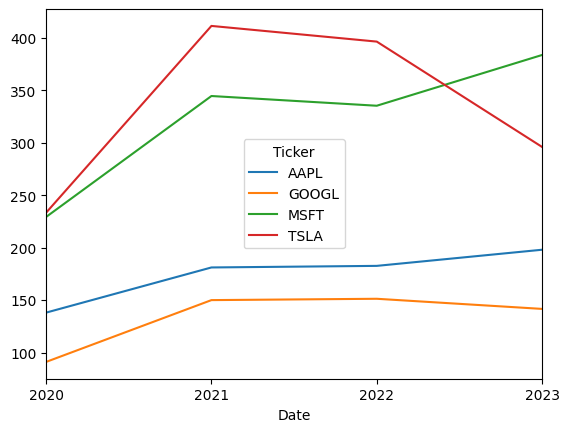

In [54]:
data.resample(rule='A').max()['Open'].plot()

<Axes: xlabel='Date'>

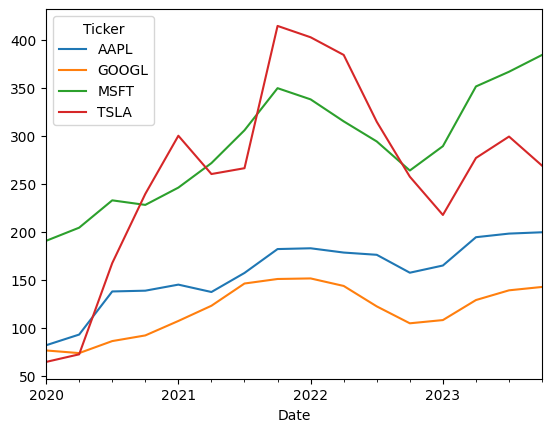

In [55]:
data.resample(rule='QS').max()['High'].plot()

In [58]:
data.resample(rule='BA').max()

Price                       Adj Close                                      \
Ticker                           AAPL       GOOGL        MSFT        TSLA   
Date                                                                        
2020-12-31 00:00:00+00:00  133.810059   91.023109  223.779404  235.223328   
2021-12-31 00:00:00+00:00  177.618881  149.468399  335.105804  409.970001   
2022-12-30 00:00:00+00:00  179.273636  147.634445  326.940796  399.926666   
2023-12-29 00:00:00+00:00  197.361084  141.170441  380.619812  293.339996   
2024-12-31 00:00:00+00:00         NaN         NaN         NaN         NaN   

Price                           Close                                      \
Ticker                           AAPL       GOOGL        MSFT        TSLA   
Date                                                                        
2020-12-31 00:00:00+00:00  136.690002   91.248497  231.649994  235.223328   
2021-12-31 00:00:00+00:00  180.330002  149.838501  343.109985  409.970001   
2022-12-30 00:00:00+00:00  182.009995  148.000000  334.750000  399.926666   
2023-12-29 00:00:00+00:00  198.110001  141.520004  382.700012  293.339996   
2024-12-31 00:00:00+00:00         NaN         NaN         NaN         NaN   

Price                            High              ...         Low  \
Ticker                           AAPL       GOOGL  ...        MSFT   
Date                                               ...               
2020-12-31 00:00:00+00:00  138.789993   92.191498  ...  227.350006   
2021-12-31 00:00:00+00:00  182.130005  150.966507  ...  342.200012   
2022-12-30 00:00:00+00:00  182.940002  151.546494  ...  329.779999   
2023-12-29 00:00:00+00:00  199.619995  142.679993  ...  378.160004   
2024-12-31 00:00:00+00:00         NaN         NaN  ...         NaN   

Price                                        Open                          \
Ticker                           TSLA        AAPL       GOOGL        MSFT   
Date                                                                        
2020-12-31 00:00:00+00:00  230.373337  138.050003   91.027000  229.270004   
2021-12-31 00:00:00+00:00  405.666656  181.119995  149.975494  344.619995   
2022-12-30 00:00:00+00:00  378.679993  182.630005  151.250000  335.350006   
2023-12-29 00:00:00+00:00  289.519989  198.020004  141.589996  383.760010   
2024-12-31 00:00:00+00:00         NaN         NaN         NaN         NaN   

Price                                       Volume                           \
Ticker                           TSLA         AAPL        GOOGL        MSFT   
Date                                                                          
2020-12-31 00:00:00+00:00  233.330002  426510000.0  108358000.0  97012700.0   
2021-12-31 00:00:00+00:00  411.470001  195432700.0   97882000.0  69870600.0   
2022-12-30 00:00:00+00:00  396.516663  182602000.0  123200000.0  90428900.0   
2023-12-29 00:00:00+00:00  296.040009  154357300.0  119455000.0  78478200.0   
2024-12-31 00:00:00+00:00         NaN          NaN          NaN         NaN   

Price                                   
Ticker                            TSLA  
Date                                    
2020-12-31 00:00:00+00:00  914082000.0  
2021-12-31 00:00:00+00:00  268189500.0  
2022-12-30 00:00:00+00:00  221923300.0  
2023-12-29 00:00:00+00:00  306590600.0  
2024-12-31 00:00:00+00:00          NaN  

[5 rows x 24 columns]

In [59]:
data.resample(rule='BQS').max()

Price                       Adj Close                                      \
Ticker                           AAPL       GOOGL        MSFT        TSLA   
Date                                                                        
2020-01-01 00:00:00+00:00   79.579330   76.055176  180.850082   61.161331   
2020-04-01 00:00:00+00:00   89.386223   73.054100  196.121414   71.987335   
2020-07-01 00:00:00+00:00  131.126709   85.657402  223.779404  166.106674   
2020-10-01 00:00:00+00:00  133.810059   91.023109  217.885681  235.223328   
2021-01-01 00:00:00+00:00  140.143738  105.669342  237.285797  294.363342   
2021-04-01 00:00:00+00:00  134.502808  122.233330  264.079041  254.106674   
2021-07-01 00:00:00+00:00  154.109375  144.856812  297.555328  263.786682   
2021-10-01 00:00:00+00:00  177.618881  149.468399  335.105804  409.970001   
2022-01-03 00:00:00+00:00  179.273636  147.634445  326.940796  399.926666   
2022-04-01 00:00:00+00:00  175.981232  142.618347  308.258331  381.816681   
2022-07-01 00:00:00+00:00  172.637207  121.778458  287.885468  309.320007   
2022-10-03 00:00:00+00:00  154.033340  104.221931  253.573456  249.440002   
2023-01-02 00:00:00+00:00  163.612930  107.473877  284.924683  214.240005   
2023-04-03 00:00:00+00:00  192.722229  126.995537  344.776672  274.450012   
2023-07-03 00:00:00+00:00  195.186279  137.868622  356.057892  293.339996   
2023-10-02 00:00:00+00:00  197.361084  141.170441  380.619812  263.619995   

Price                           Close                                      \
Ticker                           AAPL       GOOGL        MSFT        TSLA   
Date                                                                        
2020-01-01 00:00:00+00:00   81.800003   76.243500  188.699997   61.161331   
2020-04-01 00:00:00+00:00   91.632500   73.235001  203.509995   71.987335   
2020-07-01 00:00:00+00:00  134.179993   85.869499  231.649994  166.106674   
2020-10-01 00:00:00+00:00  136.690002   91.248497  224.960007  235.223328   
2021-01-01 00:00:00+00:00  143.160004  105.931000  244.990005  294.363342   
2021-04-01 00:00:00+00:00  136.960007  122.536003  271.399994  254.106674   
2021-07-01 00:00:00+00:00  156.690002  145.215500  305.220001  263.786682   
2021-10-01 00:00:00+00:00  180.330002  149.838501  343.109985  409.970001   
2022-01-03 00:00:00+00:00  182.009995  148.000000  334.750000  399.926666   
2022-04-01 00:00:00+00:00  178.440002  142.971497  314.970001  381.816681   
2022-07-01 00:00:00+00:00  174.550003  122.080002  293.470001  309.320007   
2022-10-03 00:00:00+00:00  155.740005  104.480003  257.220001  249.440002   
2023-01-02 00:00:00+00:00  164.899994  107.739998  288.299988  214.240005   
2023-04-03 00:00:00+00:00  193.970001  127.309998  348.100006  274.450012   
2023-07-03 00:00:00+00:00  196.449997  138.210007  359.489990  293.339996   
2023-10-02 00:00:00+00:00  198.110001  141.520004  382.700012  263.619995   

Price                            High              ...         Low  \
Ticker                           AAPL       GOOGL  ...        MSFT   
Date                                               ...               
2020-01-01 00:00:00+00:00   81.962502   76.537003  ...  186.470001   
2020-04-01 00:00:00+00:00   93.095001   73.789497  ...  201.429993   
2020-07-01 00:00:00+00:00  137.979996   86.305000  ...  227.350006   
2020-10-01 00:00:00+00:00  138.789993   92.191498  ...  223.580002   
2021-01-01 00:00:00+00:00  145.089996  107.257004  ...  242.919998   
2021-04-01 00:00:00+00:00  137.410004  123.095497  ...  269.600006   
2021-07-01 00:00:00+00:00  157.259995  146.253998  ...  302.000000   
2021-10-01 00:00:00+00:00  182.130005  150.966507  ...  342.200012   
2022-01-03 00:00:00+00:00  182.940002  151.546494  ...  329.779999   
2022-04-01 00:00:00+00:00  178.490005  143.712006  ...  309.869995   
2022-07-01 00:00:00+00:00  176.149994  122.430000  ...  290.420013   
2022-10-03 00:00:00+00:00  157.500000  104.820000  ...  254.309998   
2023-01-02 00:00:00+00

<Axes: xlabel='Date'>

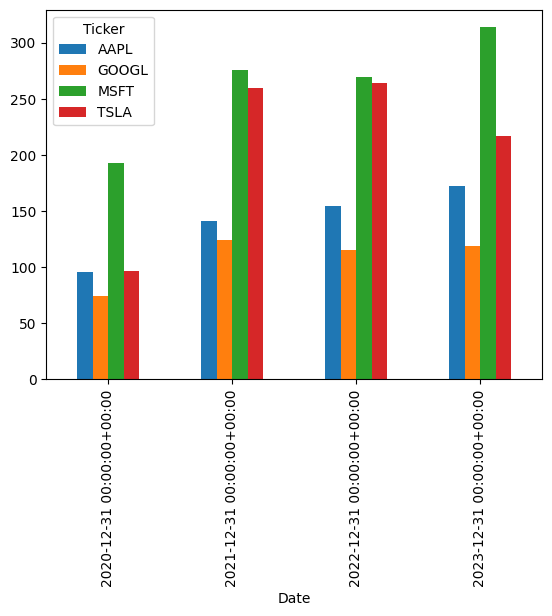

In [60]:
data['Open'].resample(rule='A').mean().plot(kind='bar')

<Axes: xlabel='Date'>

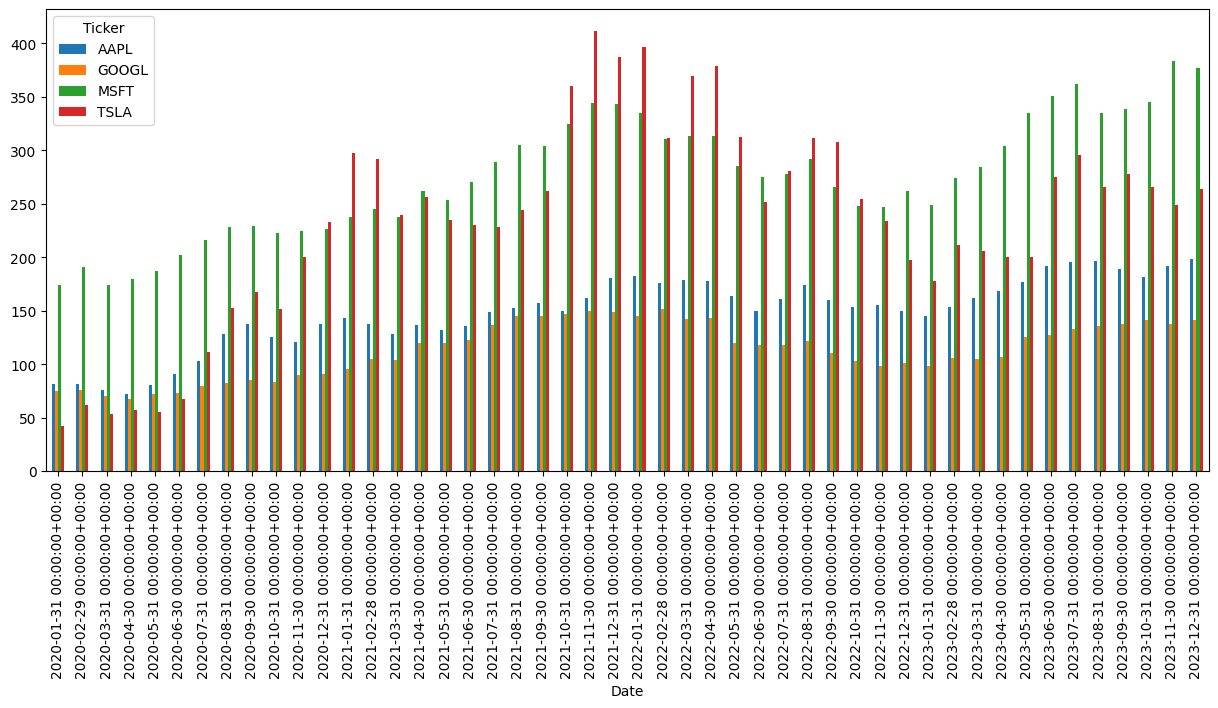

In [62]:
data['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [63]:
data['High'].rolling(11).max().head(20)

Ticker,AAPL,GOOGL,MSFT,TSLA
Date,,,,
2020-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN
2020-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN
2020-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN
2020-01-08 00:00:00+00:00,NaN,NaN,NaN,NaN
2020-01-09 00:00:00+00:00,NaN,NaN,NaN,NaN
2020-01-10 00:00:00+00:00,NaN,NaN,NaN,NaN
2020-01-13 00:00:00+00:00,NaN,NaN,NaN,NaN
2020-01-14 00:00:00+00:00,NaN,NaN,NaN,NaN


In [64]:
data.head()

Price                      Adj Close                                    \
Ticker                          AAPL      GOOGL        MSFT       TSLA   
Date                                                                     
2020-01-02 00:00:00+00:00  72.876106  68.264961  153.938202  28.684000   
2020-01-03 00:00:00+00:00  72.167610  67.907852  152.021423  29.534000   
2020-01-06 00:00:00+00:00  72.742638  69.717865  152.414352  30.102667   
2020-01-07 00:00:00+00:00  72.400543  69.583206  151.024673  31.270666   
2020-01-08 00:00:00+00:00  73.565193  70.078476  153.430222  32.809334   

Price                          Close                                    \
Ticker                          AAPL      GOOGL        MSFT       TSLA   
Date                                                                     
2020-01-02 00:00:00+00:00  75.087502  68.433998  160.619995  28.684000   
2020-01-03 00:00:00+00:00  74.357498  68.075996  158.619995  29.534000   
2020-01-06 00:00:00+00:00  74.949997  69.890503  159.029999  30.102667   
2020-01-07 00:00:00+00:00  74.597504  69.755501  157.580002  31.270666   
2020-01-08 00:00:00+00:00  75.797501  70.251999  160.089996  32.809334   

Price                           High             ...         Low             \
Ticker                          AAPL      GOOGL  ...        MSFT       TSLA   
Date                                             ...                          
2020-01-02 00:00:00+00:00  75.150002  68.433998  ...  158.330002  28.114000   
2020-01-03 00:00:00+00:00  75.144997  68.687500  ...  158.059998  29.128000   
2020-01-06 00:00:00+00:00  74.989998  69.916000  ...  156.509995  29.333332   
2020-01-07 00:00:00+00:00  75.224998  70.175003  ...  157.320007  30.224001   
2020-01-08 00:00:00+00:00  76.110001  70.592499  ...  157.949997  31.215334   

Price                           Open                                    \
Ticker                          AAPL      GOOGL        MSFT       TSLA   
Date                                                                     
2020-01-02 00:00:00+00:00  74.059998  67.420502  158.779999  28.299999   
2020-01-03 00:00:00+00:00  74.287498  67.400002  158.320007  29.366667   
2020-01-06 00:00:00+00:00  73.447502  67.581497  157.080002  29.364668   
2020-01-07 00:00:00+00:00  74.959999  70.023003  159.320007  30.760000   
2020-01-08 00:00:00+00:00  74.290001  69.740997  158.929993  31.580000   

Price                         Volume                                 
Ticker                          AAPL     GOOGL      MSFT       TSLA  
Date                                                                 
2020-01-02 00:00:00+00:00  135480400  27278000  22622100  142981500  
2020-01-03 00:00:00+00:00  146322800  23408000  21116200  266677500  
2020-01-06 00:00:00+00:00  118387200  46768000  20813700  151995000  
2020-01-07 00:00:00+00:00  108872000  34330000  21634100  268231500  
2020-01-08 00:00:00+00:00  132079200  35314000  27746500  467164500  

[5 rows x 24 columns]

In [65]:
data['Open'].rolling(30).mean()

Ticker,AAPL,GOOGL,MSFT,TSLA
Date,,,,
2020-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN
2020-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN
2020-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN
2020-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN
2020-01-08 00:00:00+00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-12-22 00:00:00+00:00,191.977334,134.499334,372.571335,239.732333
2023-12-26 00:00:00+00:00,192.298667,134.882334,373.021668,241.214334
2023-12-27 00:00:00+00:00,192.521000,135.209334,373.204002,242.639334


In [66]:
data[('Open:30 days rolling', 'AAPL')] = data[('Open', 'AAPL')].rolling(window=30,min_periods=1).mean()                                                                    
data[('Open:30 days rolling', 'GOOGL')] = data[('Open', 'GOOGL')].rolling(window=30,min_periods=1).mean()
data[('Open:30 days rolling', 'MSFT')] = data[('Open', 'MSFT')].rolling(window=30,min_periods=1).mean()
data[('Open:30 days rolling', 'TSLA')] = data[('Open', 'TSLA')].rolling(window=30,min_periods=1).mean()

In [67]:
data.head(31)

Price                      Adj Close                                    \
Ticker                          AAPL      GOOGL        MSFT       TSLA   
Date                                                                     
2020-01-02 00:00:00+00:00  72.876106  68.264961  153.938202  28.684000   
2020-01-03 00:00:00+00:00  72.167610  67.907852  152.021423  29.534000   
2020-01-06 00:00:00+00:00  72.742638  69.717865  152.414352  30.102667   
2020-01-07 00:00:00+00:00  72.400543  69.583206  151.024673  31.270666   
2020-01-08 00:00:00+00:00  73.565193  70.078476  153.430222  32.809334   
2020-01-09 00:00:00+00:00  75.127792  70.814148  155.347061  32.089333   
2020-01-10 00:00:00+00:00  75.297630  71.271523  154.628250  31.876667   
2020-01-13 00:00:00+00:00  76.906303  71.823662  156.487518  34.990665   
2020-01-14 00:00:00+00:00  75.867844  71.352821  155.385376  35.861332   
2020-01-15 00:00:00+00:00  75.542694  71.782257  156.391708  34.566666   
2020-01-16 00:00:00+00:00  76.488983  72.328911  159.257339  34.232666   
2020-01-17 00:00:00+00:00  77.335785  73.793274  160.148666  34.033333   
2020-01-21 00:00:00+00:00  76.811676  73.929443  159.573563  36.480000   
2020-01-22 00:00:00+00:00  77.085869  74.010239  158.806870  37.970669   
2020-01-23 00:00:00+00:00  77.457108  74.051132  159.784454  38.146667   
2020-01-24 00:00:00+00:00  77.233871  73.127426  158.174301  37.654667   
2020-01-27 00:00:00+00:00  74.962799  71.409683  155.529129  37.201332   
2020-01-28 00:00:00+00:00  77.083435  72.345863  158.576904  37.793331   
2020-01-29 00:00:00+00:00  78.696991  72.655090  161.049530  38.732666   
2020-01-30 00:00:00+00:00  78.582939  72.532898  165.592361  42.720669   
2020-01-31 00:00:00+00:00  75.098671  71.462051  163.148422  43.371334   
2020-02-03 00:00:00+00:00  74.892426  73.946892  167.125793  52.000000   
2020-02-04 00:00:00+00:00  77.364891  72.091988  172.627045  59.137333   
2020-02-05 00:00:00+00:00  77.995735  72.123901  172.416122  48.980000   
2020-02-06 00:00:00+00:00  78.908066  73.616219  175.990967  49.930668   
2020-02-07 00:00:00+00:00  77.835487  73.772820  176.240189  49.871334   
2020-02-10 00:00:00+00:00  78.205170  75.246681  180.850082  51.418667   
2020-02-11 00:00:00+00:00  77.733360  75.316498  176.767319  51.625332   
2020-02-12 00:00:00+00:00  79.579330  75.743950  177.026077  51.152668   
2020-02-13 00:00:00+00:00  79.012657  75.482597  176.067657  53.599998   
2020-02-14 00:00:00+00:00  79.032127  75.748932  177.639465  53.335335   

Price                          Close                                    \
Ticker                          AAPL      GOOGL        MSFT       TSLA   
Date                                                                     
2020-01-02 00:00:00+00:00  75.087502  68.433998  160.619995  28.684000   
2020-01-03 00:00:00+00:00  74.357498  68.075996  158.619995  29.534000   
2020-01-06 00:00:00+00:00  74.949997  69.890503  159.029999  30.102667   
2020-01-07 00:00:00+00:00  74.597504  69.755501  157.580002  31.270666   
2020-01-08 00:00:00+00:00  75.797501  70.251999  160.089996  32.809334   
2020-01-09 00:00:00+00:00  77.407501  70.989502  162.089996  32.089333   
2020-01-10 00:00:00+00:00  77.582497  71.447998  161.339996  31.876667   
2020-01-13 00:00:00+00:00  79.239998  72.001503  163.279999  34.990665   
2020-01-14 00:00:00+00:00  78.169998  71.529503  162.130005  35.861332   
2020-01-15 00:00:00+00:00  77.834999  71.959999  163.179993  34.566666   
2020-01-16 00:00:00+00:00  78.809998  72.508003  166.169998  34.232666   
2020-01-17 00:00:00+00:00  79.682503  73.975998  167.100006  34.033333   
2020-01-21 00:00:00+00:00  79.142502  74.112503  166.500000  36.480000   
2020-01-22 00:00:00+00:00  79.425003  74.193497  165.699997  37.970669   
2020-01-23 00:00:00+00:00  79.807503  74.234497  166.720001  38.146667   
2020-01-24 00:00:00+00:00  79.577499  73.308502  165.039993  37.654667   
2020-01-27 00:00:00+00:00  77.237503  71.586502  162.279999  37.201332   
202

<Axes: xlabel='Date'>

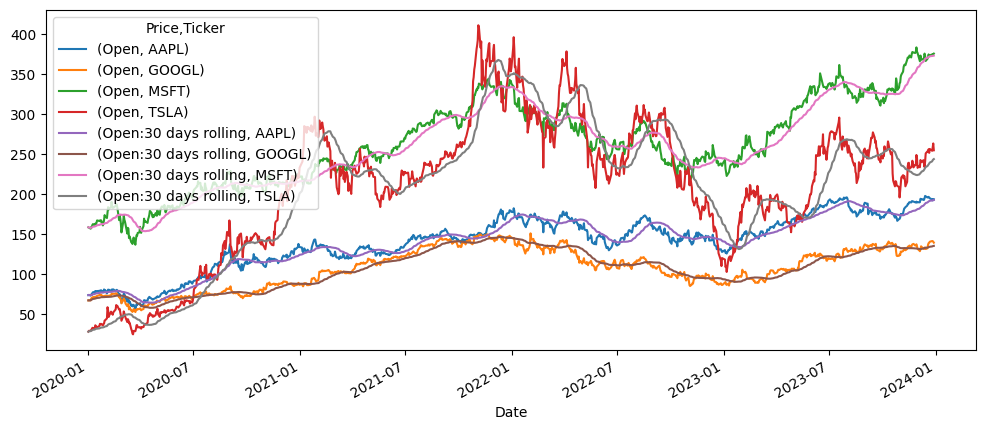

In [68]:
data[['Open','Open:30 days rolling']].plot(figsize=(12,5))

<Axes: xlabel='Date'>

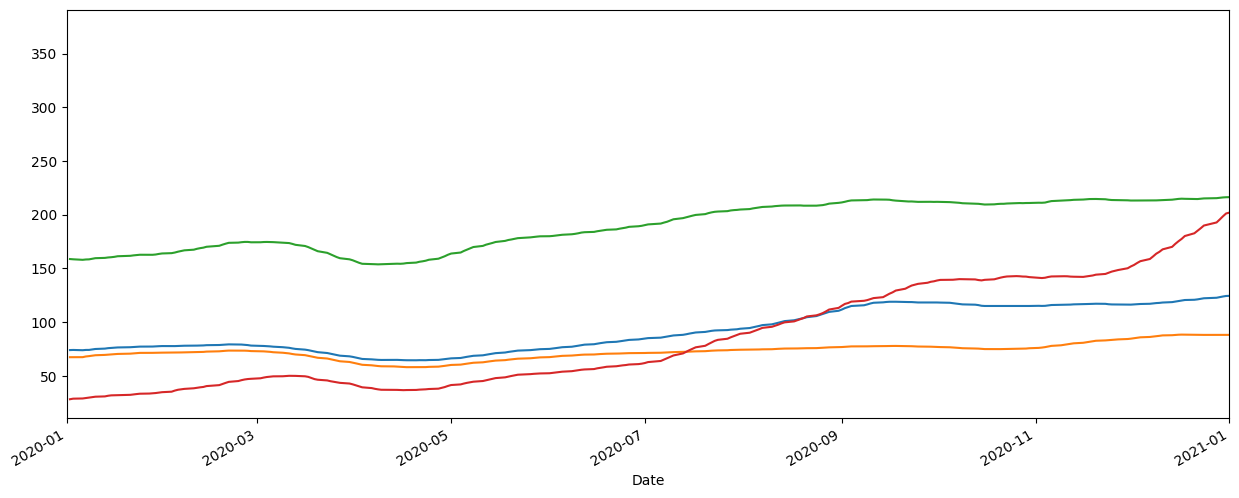

In [69]:
data[('Open:30 days rolling', 'AAPL')].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))
data[('Open:30 days rolling', 'GOOGL')].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))
data[('Open:30 days rolling', 'MSFT')].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))
data[('Open:30 days rolling', 'TSLA')].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

<Axes: xlabel='Date'>

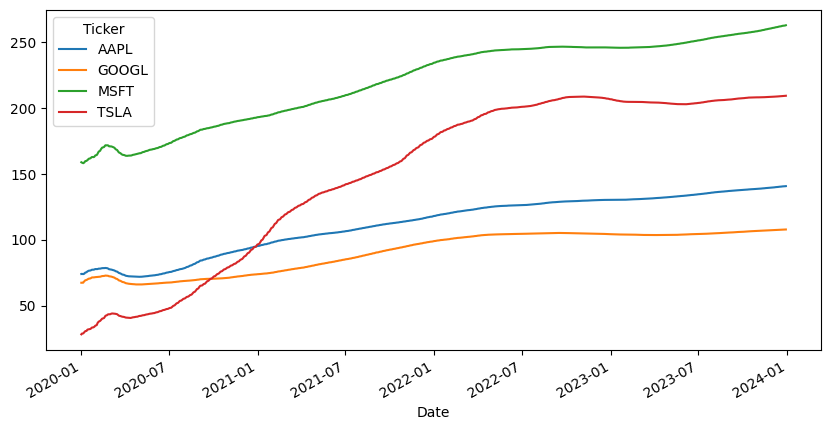

In [70]:
#CMA
data['Open'].expanding().mean().plot(figsize=(10,5))

In [72]:
import statsmodels.api as sms
from statsmodels.tsa.stattools import adfuller

In [73]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [82]:
ADF_Apple = adf_test(data['Open']['AAPL'])
print('----------------------------------')
ADF_Google = adf_test(data['Open']['GOOGL'])
print('----------------------------------')
ADF_MSFT = adf_test(data['Open']['MSFT'])
print('----------------------------------')
ADF_TSLA = adf_test(data['Open']['TSLA'])

ADF Statistics: -1.5213679861443339
p- value: 0.5229156692407708
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
----------------------------------
ADF Statistics: -1.5157919637729087
p- value: 0.5256853193633192
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
----------------------------------
ADF Statistics: -1.0689713081856094
p- value: 0.7272858836598346
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
----------------------------------
ADF Statistics: -2.219919775464787
p- value: 0.19909532251644652
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
